In [1]:
# Importing the ususal Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the cancer dataset
from sklearn.datasets import load_breast_cancer

# Importing and creating random value for training
import random
rand = random.randint(0, 100000)

In [2]:
# Creating a variable to hold our breast cancer data
breast_cancer = load_breast_cancer() 
# Using pandas library DataFrame command to create table from data
input_data = pd.DataFrame(breast_cancer.data) 
input_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Get the different data labels and add them to the table
labels = breast_cancer.target
labels.shape

(569,)

In [4]:
# Use the previously found size of the array to reshape it into something I can use
labels = np.reshape(labels,(569,1)) 
# Add the labels to the already created data set
final_breast_data = np.concatenate([input_data,labels],axis=1)

In [5]:
# Now use this new data set to create a proper table with labels
breast_dataset = pd.DataFrame(final_breast_data) 
features = breast_cancer.feature_names
features_labels = np.append(features,'label') 
breast_dataset.columns = features_labels 
breast_dataset.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [6]:
#Split the outcome from the rest of the data
X = breast_dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]].values 
Y = breast_dataset.iloc[:, 30].values 

In [7]:
#Now to split the data set into test and verification sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.2, random_state = rand)

In [8]:
#Standardize the values to avoid overfitting
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

In [9]:
############################################# Question 1 #################################################################

In [10]:
#And now to do the Linear Regression
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train) 

LogisticRegression(random_state=0)

In [11]:
#Creating a prediction 
Y_pred = classifier.predict(X_test)

#Using confusion matrix to obtain accuracy and other statistics
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

# Create varibales to hold the accuracy, precision, and recall
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)

# Use those variables to create an average to represent the overall quality of the model
comparison = (accuracy + precision + recall)/3
              

Accuracy: 0.9736842105263158
Precision: 0.974025974025974
Recall: 0.9868421052631579


Text(0.5, 257.44, 'Predicted label')

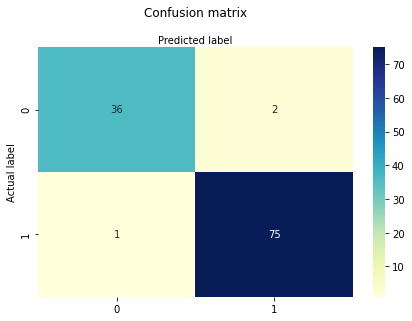

In [12]:
#Heat map of my confusion matrix
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# Create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [13]:
############################################# Question 2 #################################################################

In [14]:
# First, import the PCA function
from sklearn.decomposition import PCA 
# Separating out the features 
x = breast_dataset.loc[:, features].values 
# Separating out the target 
y = breast_dataset.loc[:,['label']].values 
# Standardizing the features 
x = StandardScaler().fit_transform(x) 

# Initalize 3 lists to hold my Accuracy, Preception, and Recall respectively
AccGraph = []
PreGraph = []
ReGraph = []


In [15]:
# Use a for loop to iterate through all possible k values
for k in range(1, 31):
    pca = PCA(n_components=k)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)]) 
    finalDf = pd.concat([principalDf, breast_dataset[['label']]], axis = 1)
    
    outcome = finalDf.pop("label")
    
    X2 = finalDf.values
    Y2 = outcome.values
    # Did not use the 'rand' value from above so that the training for this could be truly random
    X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, train_size=0.8, test_size = 0.2, random_state = random.randint(0, 100000))
    
    classifier.fit(X_train, Y_train)
    
    # Creating a prediction 
    Y_pred = classifier.predict(X_test)

    # Using confusion matrix to obtain accuracy and other statistics
    from sklearn.metrics import confusion_matrix 
    cnf_matrix = confusion_matrix(Y_test, Y_pred) 
    from sklearn import metrics
    
    # Variables to hold the Accuracy, Precision, and Recall
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)
    
    # Saving the values to the appropriate list
    AccGraph.append(accuracy)
    PreGraph.append(precision)
    ReGraph.append(recall)
    
    # Averaging the three values for comparison
    test = (accuracy + precision + recall)/3
    
    #Comparing the current "most accurate" average with current average
    if comparison < test: 
        comparison = test
        #If the current model is more accurate overall, save its k
        bestK = k

In [16]:
# Now to use the PCA function with the most ideal number of inputs 'k'
pca = PCA(n_components=bestK)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,bestK+1)]) 
finalDf = pd.concat([principalDf, breast_dataset[['label']]], axis = 1)

# Use the pop command to remove the outcomes from our table
outcome = finalDf.pop("label")

# Use the values from the table for the X values now that the outcomes are removed
X2 = finalDf.values
# Use the values from the new table created from the pop command for the Y values
Y2 = outcome.values
# Standard training/test split, used the rand value to ensure the new data set was divided like the original was
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, train_size=0.8, test_size = 0.2, random_state = rand)

classifier.fit(X_train, Y_train)
    
#Create a prediction 
Y_pred = classifier.predict(X_test)

# Using confusion matrix to obtain accuracy and other statistics
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
from sklearn import metrics 
print(bestK, " Variables are most ideal:")
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))

21  Variables are most ideal:
Accuracy: 0.9736842105263158
Precision: 0.974025974025974
Recall: 0.9868421052631579


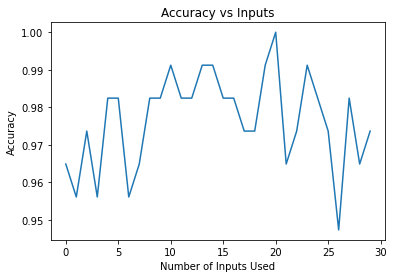

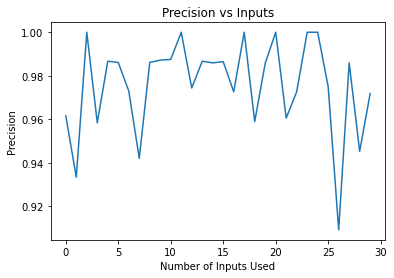

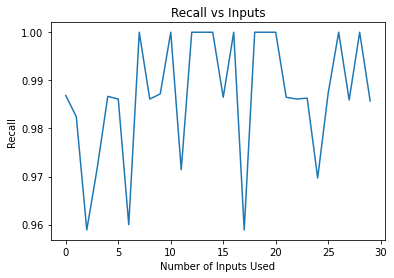

In [17]:
# Now graph the three lists that were populated in the for loop

# Graph of the Accuracy vs the number of Inputs
plt.plot(AccGraph)
plt.xlabel('Number of Inputs Used')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Inputs')
plt.show()

# Graph of the Precision vs the number of Inputs
plt.plot(PreGraph)
plt.xlabel('Number of Inputs Used')
plt.ylabel('Precision')
plt.title('Precision vs Inputs')
plt.show()

# Graph of the Recall vs the number of Inputs
plt.plot(ReGraph)
plt.xlabel('Number of Inputs Used')
plt.ylabel('Recall')
plt.title('Recall vs Inputs')
plt.show()

In [18]:
############################################# Question 3 #################################################################

In [19]:
# Import the LDA function
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
# Can only use 1 n_components because we only have two states, cancer or benign
lda = LinearDiscriminantAnalysis(n_components=1) 
lda_t = lda.fit_transform(X,Y)

In [20]:
# LDA for classification: 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.2, random_state = rand)
lda.fit(X_train,Y_train) 
Y_pred = lda.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, Y_pred)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.9736842105263158
Precision: 0.9620253164556962
Recall: 1.0
